# Homework Assignment #4 : Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1

* Let's perform the linear regression with the automobile data (automobile.csv)

In [4]:
df_auto = pd.read_csv('./automobile.csv')

In [5]:
df_auto.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


(a) Separate the dataframe with features and target variables according to the directions below,
* Features: **wheel-base**, **length**, **horsepower**, **average-mileage**
* Target: **price**

In [7]:
# your code here
features = df_auto[['wheel-base', 'length', 'horsepower', 'average-mileage']]
target = df_auto['price']

In [8]:
features

,wheel-base,length,horsepower,average-mileage
0,88.6,168.8,111,21
1,88.6,168.8,111,21
2,94.5,171.2,154,19
3,99.8,176.6,102,24
4,99.4,176.6,115,18
...,...,...,...,...
56,97.3,171.7,85,27
57,97.3,171.7,52,37
58,97.3,171.7,100,26
59,104.3,188.8,114,23


In [9]:
target

0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
       ...   
56     7975.0
57     7995.0
58     9995.0
59    12940.0
60    13415.0
Name: price, Length: 61, dtype: float64

(b) Split the data into training and test sets using scikit-learn package.

In [11]:
# your code here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(45, 4) (16, 4) (45,) (16,)


(c) Fit the train set with the linear regression model of sklearn package (LinearRegression()) and make a prediction to the test set. 

In [14]:
# your code here
import sklearn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.predict(x_test)

array([ 4383.35649241,  8195.61666314, 15832.56291156,  6103.26294131,
        9845.85528959, 30114.45018936, 38910.736265  ,  3748.55602421,
        8195.61666314, 13235.25725793, 33020.34759524, 24709.23182751,
       15662.70338731, 16464.58093659,  5850.78351725, 22667.48496664])

(d) Plot the scatter plot to compare the actual output values (y_test) with the predicted values.

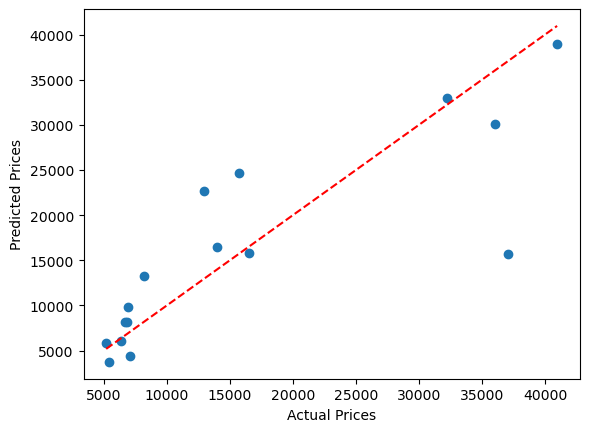

In [16]:
# your code here
predictions = regressor.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # 대각선 참고선
plt.show()

(e) Evaluate the performance of the model with the mean absolute error metric.

In [18]:
# your code here
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

4253.321656616997

### Problem 2

* Here the online shoppers intention data with prepared the train-test set for applying machine learning algorithms.

In [20]:
df_intention = pd.read_csv('./online_shoppers_intention.csv')

x = df_intention.drop(['Month', 'VisitorType', 'Weekend', 'Revenue'], axis=1)
y = df_intention['Revenue']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

(a) Fit the train data to the **k-nearest neighbors (k-NN)** model (with k=5), make a prediction to the test set, and then obtain the accuracy of the model.

In [22]:
# your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

#K-NN 모델 정확도 계산
metrics.accuracy_score(y_test, pred_knn)

0.8679857281868311

(b) Fit the train data to the **Support Vector Machine (SVM)** model, make a prediction to the test set, and then obtain the accuracy of the model.

In [24]:
# your code here
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
pred_svc =svc.predict(x_test)

# SVM 모델 정확도 계산
metrics.accuracy_score(y_test, pred_svc)

0.8550113525786571

(c) Fit the train data to the **Random Forest** model, make a prediction to the test set, and then obtain the accuracy of the model.

In [26]:
# your code here
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

# Random Forest 모델 정확도 계산 (실행할떄 마다 결과가 달라짐)
metrics.accuracy_score(y_test, pred_rfc)

0.9023678235484918